# Étude de marché : la poule qui chante s'exporte 🐔 ✈️

## Importation des librairies et création de fonctions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# intègre les objets python dans des cellules markdown
from IPython.display import Markdown as md

In [2]:
def infosurdf(df):
    d1 = pd.DataFrame(df.dtypes).T.rename(index={0: "type de la colonne"})
    d2 = pd.DataFrame(df.isnull().sum()).T.rename(index={0: "nombre de valeurs NaN"})
    d3 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: "valeurs nulles en %"})
    d4 = pd.DataFrame(df.nunique()).T.rename(index={0: "nombre de valeurs uniques"})
    d5 = pd.DataFrame(df.count()).T.rename(index={0: "nombre de valeurs totales"})
    return pd.concat([d1, d2, d3, d4, d5])

# code Nicolas Rangeon d'Openclassroom

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1, :], pcs[d2, :], 
                   angles='xy', scale_units='xy', scale=1, color="red")
            else:
                lines = [[[0, 0],[x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.08, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='12', ha='center', va='center', rotation=label_rotation, color="red", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='r')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontsize=16, fontweight='bold')
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure       
            fig = plt.figure(figsize=(7, 6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:,[d1, d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='10', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1), fontsize=16, fontweight='bold')
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    # critère de Kaiser
    p = len(df.columns)
    kaiser = 100 / p
        
    plt.figure(figsize=(15, 10))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.axhline(y=kaiser, color='red', linestyle='--')
    plt.xticks(np.arange(len(scree))+1)
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres", fontsize=16, fontweight='bold')
    plt.show(block=False)
    scree_cum = (pca.explained_variance_ratio_*100).cumsum()
    scree_cum = pd.DataFrame(data=scree_cum, index=np.arange(len(scree))+1, columns=['Cumul de variance expliquée']).T
    print(scree_cum)
    
    
def plot_dendrogram(Z, names, orient):
    plt.figure(figsize=(10, 25))
    plt.title('Classification Ascendante Hiérarchique', fontsize=16, fontweight='bold')
    plt.xlabel('distance')
    dendrogram(Z, labels = names, orientation = orient, leaf_font_size=10, color_threshold=14)
    plt.show()

## Importation du df

In [3]:
data = pd.read_csv('bdd_la_poule_qui_chante.csv')
data = data.set_index('Pays')
data

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Country Code,Taux douane,Valeur import ($/t),%Protéines volailles/protéines animales
Pays,,,,,,,,,,,,,
Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80,AFG,5.923333,151.00,0.05
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28,ZAF,4.610000,3.32,0.40
Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38,ALB,0.850000,40.95,0.10
Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92,DZA,9.380000,1708.59,0.08
Allemagne,7.96,646.0,842.0,1514.0,82658.409,0.01,63.0,53071.5,0.59,DEU,1.960000,15.85,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,4.65,3.0,249.0,1272.0,105172.925,0.01,26.0,8120.9,-1.19,PHL,1.660000,0.00,0.18
Timor-Leste,1.46,0.0,11.0,1.0,1243.258,0.02,14.6,3177.5,0.07,TLS,2.500000,0.00,0.10
Turkménistan,1.53,0.0,9.0,20.0,5757.667,0.02,36.7,14205.0,-0.13,TKM,0.000000,0.00,0.04


In [4]:
df = data.copy()
del df['Country Code']
del df['%Protéines volailles/protéines animales'] #conserve les données sans le ratio
del df['%Evol Pop 2016/2017'] #conserve Pop 2017

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Afghanistan to Cuba
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Disponibilité en protéines de volailles (g/pers/jour)  160 non-null    float64
 1   Exportation (Milliers de tonnes)                       160 non-null    float64
 2   Importations (Milliers de tonnes)                      160 non-null    float64
 3   Production (Milliers de tonnes)                        160 non-null    float64
 4   Pop 2017                                               160 non-null    float64
 5   Disponibilité en protéines animales (g/pers/jour)      160 non-null    float64
 6   PIB/hab ($)                                            160 non-null    float64
 7   Indice de stabilité politique                          160 non-null    float64
 8   Taux douane                                 

In [6]:
df.describe()

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t)
count,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.292313,111.481250,94.950000,759.150000,4.524940e+04,35.405000,20521.793750,-0.061063,6.370705,141.248750
std,5.591014,474.019743,191.138489,2558.808472,1.584264e+05,21.200243,20661.791527,0.887260,5.670292,510.067689
min,0.040000,0.000000,0.000000,0.000000,5.204500e+01,0.000000,893.700000,-2.940000,0.000000,0.000000
25%,2.412500,0.000000,4.000000,16.500000,3.071537e+03,18.000000,5114.050000,-0.622500,1.960000,2.435000
50%,6.810000,1.000000,19.000000,79.000000,9.875108e+03,34.200000,13509.500000,0.015000,4.574500,16.295000
75%,10.365000,17.250000,91.000000,470.500000,3.118956e+04,51.775000,28880.475000,0.650000,10.045000,56.592500
max,27.870000,4222.000000,1069.000000,21914.000000,1.421022e+06,95.700000,126144.000000,1.430000,35.677368,4992.860000


In [7]:
infosurdf(df)

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t)
type de la colonne,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nombre de valeurs NaN,0,0,0,0,0,0,0,0,0,0
valeurs nulles en %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nombre de valeurs uniques,156,51,84,122,160,117,160,123,127,132
nombre de valeurs totales,160,160,160,160,160,160,160,160,160,160


## Création de la matrice des données et normalisation des données

In [8]:
# création d'un tableau numpy 2D
X = df.values
# les index sont stockés dans un objet names
names = df.index
# nos colonnes dans une variable features
features = df.columns
# forme de l'array
X.shape

(160, 10)

In [9]:
# création de l'objet standardiseur
scaler = preprocessing.StandardScaler()
# calcul des données transformées
X_scaled = scaler.fit_transform(X)

In [10]:
# On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Analyse en composantes principales

Notre dataframe contient 10 variables. La corrélation entre certaines de ces variables peut amener des pb de multicolinéarité (d'ou la suppression de deux variables précedemment).
A l'aide d'une ACP, nous allons réduire la dimensionnalité de cet ensemble pour trouver sa dimension intrinsèque.

In [11]:
# création de l'objet PCA (10 composantes)
pca = decomposition.PCA()
# application de l'ACP aux données standardisées
pca.fit(X_scaled)

PCA()

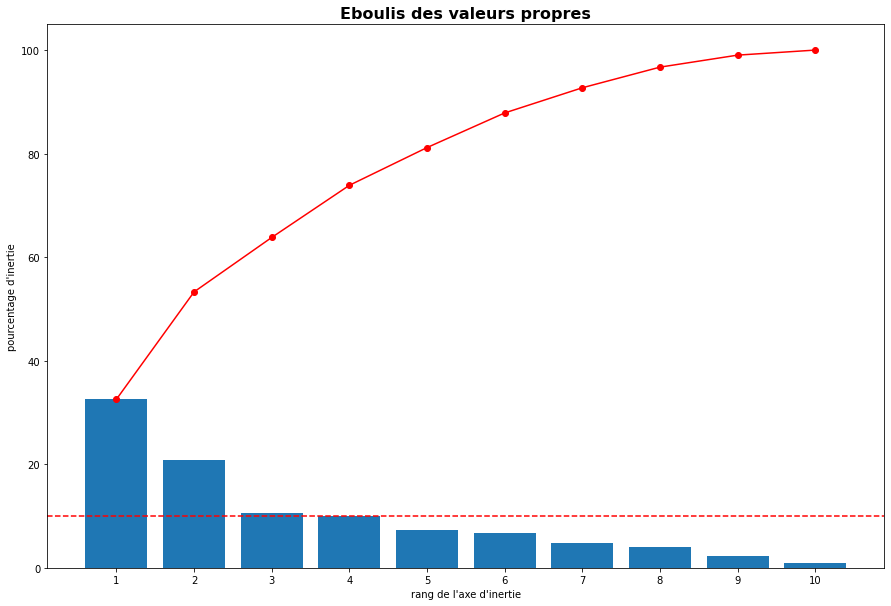

                                    1          2          3          4   \
Cumul de variance expliquée  32.548764  53.292486  63.807159  73.880031   

                                   5          6          7          8   \
Cumul de variance expliquée  81.16796  87.857769  92.719088  96.703596   

                                    9      10  
Cumul de variance expliquée  99.024341  100.0  


In [12]:
display_scree_plot(pca)

- On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
- On voit ici que 87% de la variance est comprise dans les 6 premières composantes.

In [13]:
# critère de Kaiser
p = len(df.columns)
kaiser = 100 / p
print(round(kaiser,2), "%") # critère à vérifier

10.0 %


Les 6 premières CP expliquent 87% de la variance totale des données. Nous pouvons donc dire que la dimension intrinsèque de cet ensemble de données est égale à 6.
Transformons le df initial à 10 variables en un df à 6 variables :

In [14]:
# création de l'objet PCA (6 composantes)
pca6 = decomposition.PCA(n_components=6)
# application de l'ACP aux données standardisées
X_trans = pca6.fit_transform(X_scaled)
# création d'un Dataframe à 3 variables
df_trans = pd.DataFrame(X_trans, index=names, columns=['1e CP', '2e CP', '3e CP','4e CP', '5e CP', '6e CP'])
df_trans

,1e CP,2e CP,3e CP,4e CP,5e CP,6e CP
Pays,,,,,,
Afghanistan,-2.692532,0.917831,-0.115317,-1.093312,-0.496082,-1.414536
Afrique du Sud,0.976772,0.395985,-1.126560,-0.764627,-1.582408,0.489616
Albanie,0.657352,-0.746990,0.224821,-0.421722,0.748906,-0.669746
Algérie,-1.704940,0.431351,2.751637,-0.686230,-0.863224,0.478740
Allemagne,3.295076,0.495742,-1.274396,-1.840584,-1.966360,0.298546
...,...,...,...,...,...,...
Philippines,-0.600620,0.756932,-0.578797,-1.393780,-0.304722,-0.608689
Timor-Leste,-1.192941,-0.263694,-0.035214,-0.437295,0.606988,-0.698887
Turkménistan,-0.368519,-0.419131,0.141754,-0.811057,0.833164,-1.050812


# Cercle des corrélations

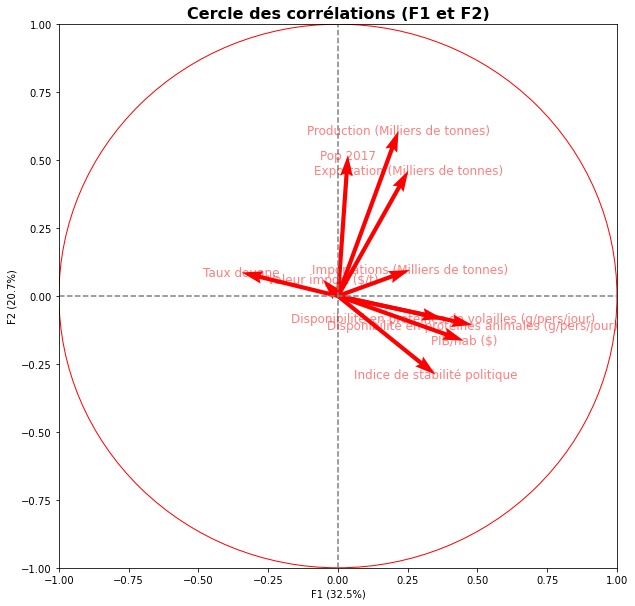

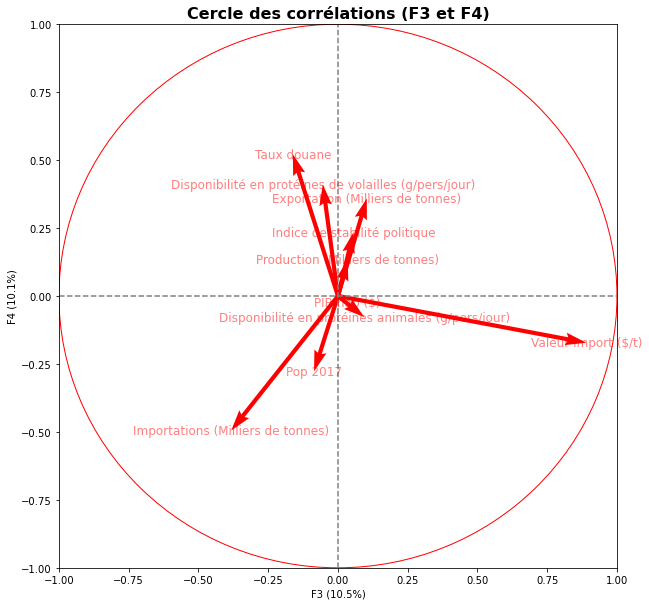

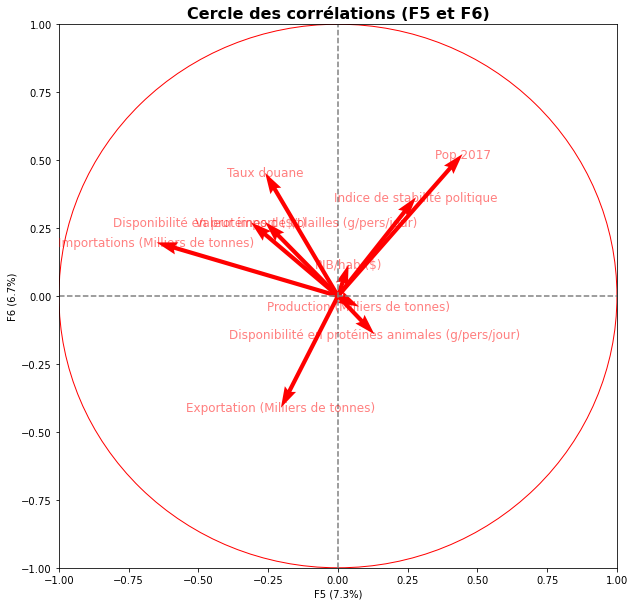

In [15]:
# calcul des différentes composantes
pcs = pca6.components_
#nombre de composantes principales retenues
n_comp = 6

display_circles(pcs, n_comp, pca6, [(0, 1), (2, 3), (4, 5)], labels = np.array(df.columns))

<b> Analyse des cercles: </b>

- La variable avec une contribution négative à la 1e CP correspondent à celles dont le taux doit être le plus faible possible : les frais de douanes. Nous cherchons effectivement à nous implanter dans des pays aux frais de douane faibles pour minimiser les couts. Les autres variables ont un effet positif, 4 avec un effet plus marqué : le PIB/habitant, l'index de stabilité et les apports en protéine. Comme vu dans la partie préparatoire, il y a une corrélation entre PIB et consommation de viande. Les fortes valeurs de la 1e CP caractérisent les pays stables et riches où la consommation de viande est importante.

- La 2e CP est impacté fortement par la population, les exportations et la production, elle caractérise donc l'auto-suffisance, minimisée par une stabilité politique basse et un PIB bas.

- La 3e CP est influencée positivement par la valeur de l'import et négativement par les importations. (Cette CP caractérise les aspects financiers).

- La 4e CP est influencée positivement par la disponibilité en protéines de volailles, les exportations et les taux de droits de douane (variables que nous voulons les plus faibles possibles) et négativement par la population, les importations (que nous voulons plus fortes). Cette composante devra donc être la plus petite possible

- La 5e CP est influencée positivement par la population et la stabilité politique et négativement par les importations, et la valeur de l'import.

- La 6e CP est influencée positivement par les taux des droits de douane, la stabilité politique et la population  et négativement par les exportations.

### Classification Ascendante hiérarchique

Méthode de Ward : on regroupe les classes afin que l'augmentation de l'inertie interclasse soit maximale, ou, ce qui revient au même d'après le théorème de Huygens, afin que l'augmentation de l'inertie intraclasse soit minimale.

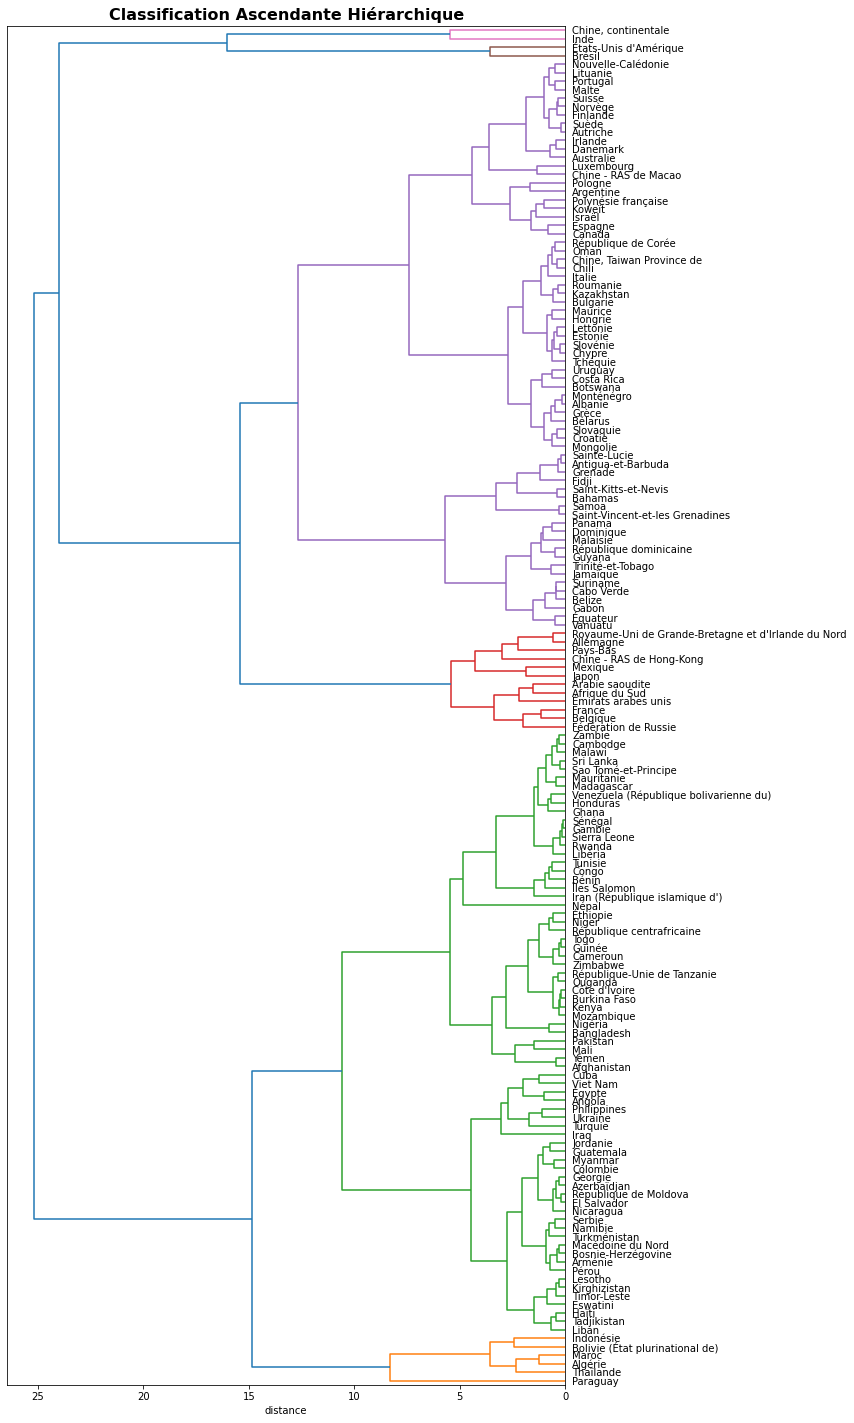

In [16]:
Z = linkage(X_trans, 'ward')

plot_dendrogram(Z, names, 'left')

Nous obtenons 6 clusters de différentes tailles :

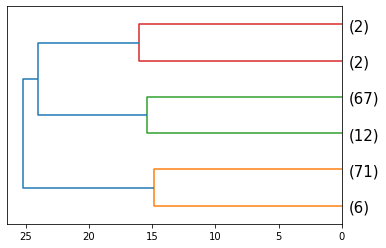

In [17]:
dendrogram(Z, p=6, truncate_mode='lastp', leaf_font_size=15, orientation='left');

Il apparaît donc 6 groupes de pays, dont deux contenant seulement 2 pays.  
Nous récupérons les clusters ainsi créés et les implémentons dans notre df initial.

In [18]:
clusters = fcluster(Z, 6, criterion='maxclust')
df['Cluster CAH'] = clusters
df

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),Cluster CAH
Pays,,,,,,,,,,,
Afghanistan,0.54,0.0,29.0,28.0,36296.113,10.7,2058.4,-2.80,5.923333,151.00,2
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,35.7,13860.3,-0.28,4.610000,3.32,3
Albanie,6.26,0.0,38.0,13.0,2884.169,61.0,12771.0,0.38,0.850000,40.95,4
Algérie,1.97,0.0,2.0,275.0,41389.189,25.0,11737.4,-0.92,9.380000,1708.59,1
Allemagne,7.96,646.0,842.0,1514.0,82658.409,63.0,53071.5,0.59,1.960000,15.85,3
...,...,...,...,...,...,...,...,...,...,...,...
Philippines,4.65,3.0,249.0,1272.0,105172.925,26.0,8120.9,-1.19,1.660000,0.00,2
Timor-Leste,1.46,0.0,11.0,1.0,1243.258,14.6,3177.5,0.07,2.500000,0.00,2
Turkménistan,1.53,0.0,9.0,20.0,5757.667,36.7,14205.0,-0.13,0.000000,0.00,2


Nous pouvons maintenant regroupé les pays par cluster.  
Nous ajoutons 1 colonne pour notre analyse :  
    - le ratio Import/Export qui nous renseignera sur la dépendance du pays aux importations.

In [19]:
CAH_df = df.groupby('Cluster CAH').mean()
# création d'une colonne ratio Import/Export
CAH_df['Ratio Import/Export'] = CAH_df['Importations (Milliers de tonnes)'] / CAH_df['Exportation (Milliers de tonnes)']
CAH_df

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),Ratio Import/Export
Cluster CAH,,,,,,,,,,,
1,4.876667,134.166667,1.666667,932.000000,7.148186e+04,27.283333,11403.716667,-0.470000,6.385965,2294.691667,0.012422
2,3.439296,11.746479,47.521127,272.000000,3.032531e+04,20.185915,6753.536620,-0.705915,8.396797,60.084507,4.045564
3,11.450833,378.583333,659.666667,1575.333333,6.228201e+04,54.791667,43736.341667,0.234167,2.616667,19.122500,1.742461
4,10.680448,47.194030,49.462687,294.925373,9.222599e+03,48.200000,31661.017910,0.623284,4.978573,57.871940,1.048071
5,17.805000,3956.500000,63.000000,18057.500000,2.664593e+05,63.150000,37219.700000,-0.090000,5.125000,219.980000,0.015923
6,2.355000,290.000000,226.000000,10890.500000,1.379849e+06,27.350000,7499.950000,-0.610000,4.805000,9.400000,0.779310


Ces données, une fois normalisées, peuvent être visualisés sur une heatmap :

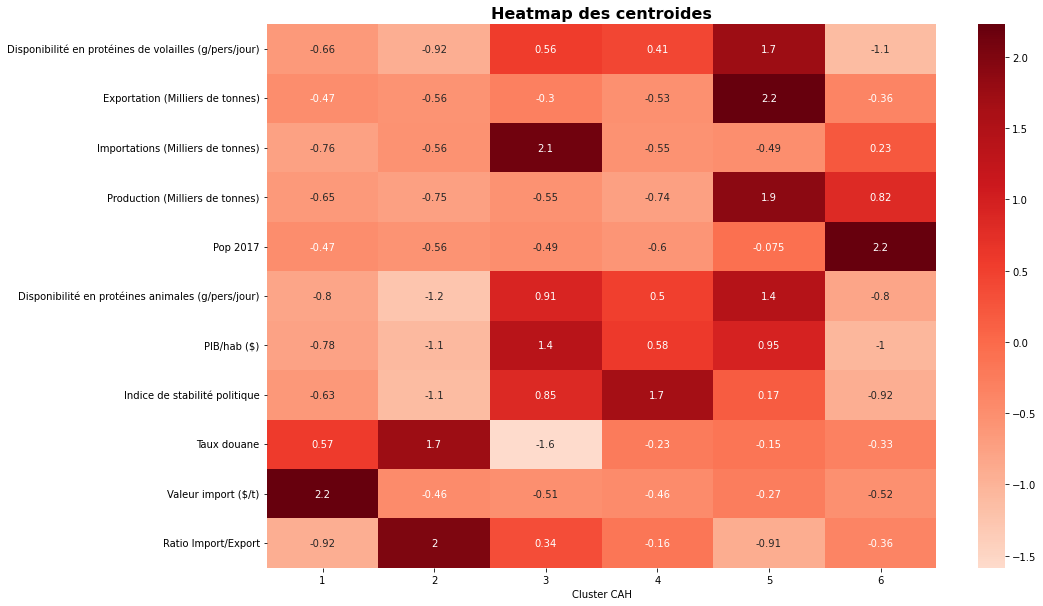

In [20]:
# les données sont centrées et réduites
CAH_scaled = scaler.fit_transform(CAH_df)
CAH_scaled = pd.DataFrame(CAH_scaled, index=CAH_df.index, columns=CAH_df.columns).T

fig = plt.figure(figsize=(15, 10))
sns.heatmap(CAH_scaled, center=0, cmap='Reds', annot=True)
plt.title('Heatmap des centroides', fontsize=16, fontweight='bold');

Les numéros de clusters sont affectés aléatoirement, nous les stockons dans des variables pour les intégrer automatiquement à notre analyse.

In [21]:
clusterCAH1 = CAH_df.index[CAH_df['Valeur import ($/t)'] == max(CAH_df['Valeur import ($/t)'])][0]
clusterCAH2 = CAH_df.index[CAH_df['Indice de stabilité politique'] == min(CAH_df['Indice de stabilité politique'])][0]
clusterCAH3 = CAH_df.index[CAH_df['Importations (Milliers de tonnes)'] == max(CAH_df['Importations (Milliers de tonnes)'])][0]
clusterCAH4 = CAH_df.index[CAH_df['Pop 2017'] == min(CAH_df['Pop 2017'])][0]
clusterCAH5 = CAH_df.index[CAH_df['Exportation (Milliers de tonnes)'] == max(CAH_df['Exportation (Milliers de tonnes)'])][0]
clusterCAH6 = CAH_df.index[CAH_df['Pop 2017'] == max(CAH_df['Pop 2017'])][0]

In [22]:
# Nombre et pays de chaque cluster
for i in df.sort_values('Cluster CAH')['Cluster CAH'].unique():
    print('Cluster CAH', i, ':', len(df[df['Cluster CAH']==i]), 'pays\n' + 
        ', '.join(df[df['Cluster CAH']==i].index.values), '\n' + '- '*3)

Cluster CAH 1 : 6 pays
Algérie, Bolivie (État plurinational de), Indonésie, Maroc, Paraguay, Thaïlande 
- - - 
Cluster CAH 2 : 71 pays
Afghanistan, Angola, Arménie, Azerbaïdjan, Bangladesh, Bosnie-Herzégovine, Burkina Faso, Bénin, Cambodge, Cameroun, Colombie, Congo, Côte d'Ivoire, El Salvador, Eswatini, Gambie, Ghana, Guatemala, Guinée, Géorgie, Honduras, Iran (République islamique d'), Jordanie, Kenya, Kirghizistan, Lesotho, Liban, Macédoine du Nord, Madagascar, Malawi, Mali, Mauritanie, Mozambique, Myanmar, Namibie, Nicaragua, Niger, Nigéria, Népal, Ouganda, Pakistan, Rwanda, République centrafricaine, République de Moldova, République-Unie de Tanzanie, Sao Tomé-et-Principe, Serbie, Sierra Leone, Sri Lanka, Sénégal, Tadjikistan, Togo, Tunisie, Turquie, Ukraine, Viet Nam, Zambie, Zimbabwe, Égypte, Éthiopie, Pérou, Venezuela (République bolivarienne du), Yémen, Haïti, Iraq, Libéria, Philippines, Timor-Leste, Turkménistan, Îles Salomon, Cuba 
- - - 
Cluster CAH 3 : 12 pays
Afrique du S

Chaque groupe présente un maximum et un minimum dans des variables différentes ce qui permet de les caractériser globalement.

<b>Analyse des clusters :</b>

- <b> ClusterCAH1 :</b> pays producteur de volaille qui importe très peu. Ou la valeur d'import est cependant très élevé mais une stabilité politique faible.

- <b> ClusterCAH2 :</b> pays en voie de développement à la stabilité politique basse. Les frais de douane y sont élevés et le prix à l'import est le plus faible. La demande en viande de volailles pourrait y être forte (production faible, forte dépendance aux importations) mais les difficultés économiques écartent ces pays pour nos exportations.

- <b> ClusterCAH3 :</b> pays riches et stables politiquement avec une forte dépendance aux importations et à un prix élevé. Les taux de douanes sont faibles, ce sont les pays de ce cluster que nous devons cibler.  

- <b> ClusterCAH4 :</b> Petits pays stables politiquement avec un PBI élevé. Ils importent autant qu'ils exportent  et on une dépendance moyenne à l'importation. Valeur d'import supérieur au cluster 3 (cible).

- <b> ClusterCAH5 :</b> Les EUA et le Brésil, pays producteurs de volaille (dépendance aux importations très faible) avec une forte exportation.

- <b> ClusterCAH6 :</b> L'Inde et la Chine (population supérieure à 1 Milliard). La consommation de volailles y est faible.


<Figure size 1080x720 with 0 Axes>

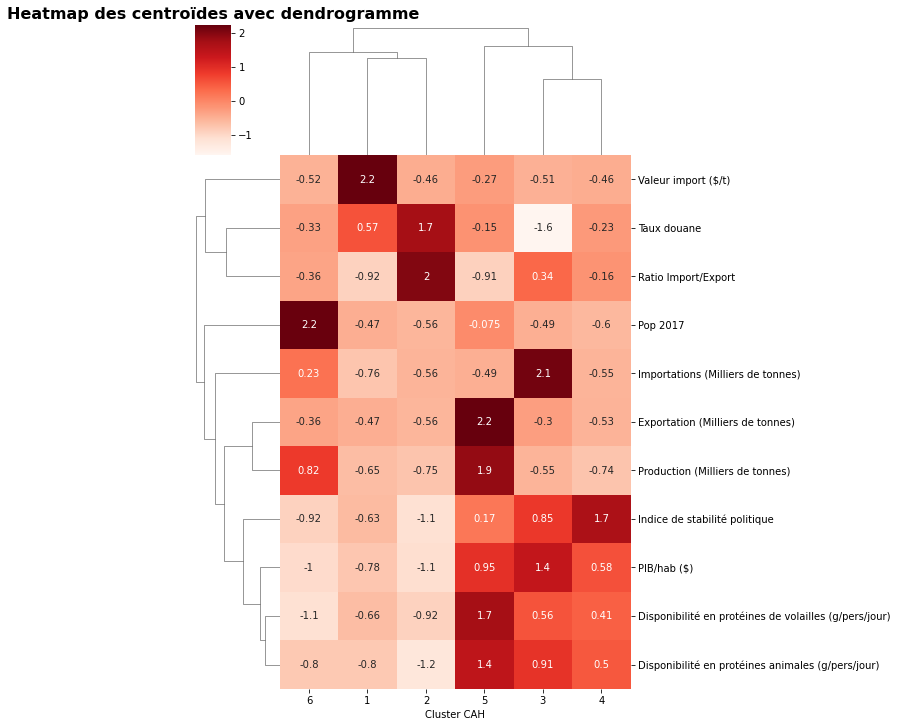

In [25]:
fig = plt.figure(figsize=(15,10))
sns.clustermap(CAH_scaled, cmap='Reds', annot=True)
plt.title('Heatmap des centroïdes avec dendrogramme', fontsize=16, fontweight='bold');

Je conserve le clusterCAH3 et peut être CAH4 qui sont très proches et regroupent des pays developpés avec un potentiel marché intéressant.  
En conclusion à ce premier partitionnement ressort que <b>12 pays sont susceptibles de devenir une cible pertinente pour l'entreprise</b>.

# Analyse statistique

Pour vérifier que les groupes diffèrent réellement, on peut recourir aux tests statistiques.

### Représentation de la distribution des variables

Nous créons ici une boucle pour représenter la distribution de chaque variable sous forme de boxplot

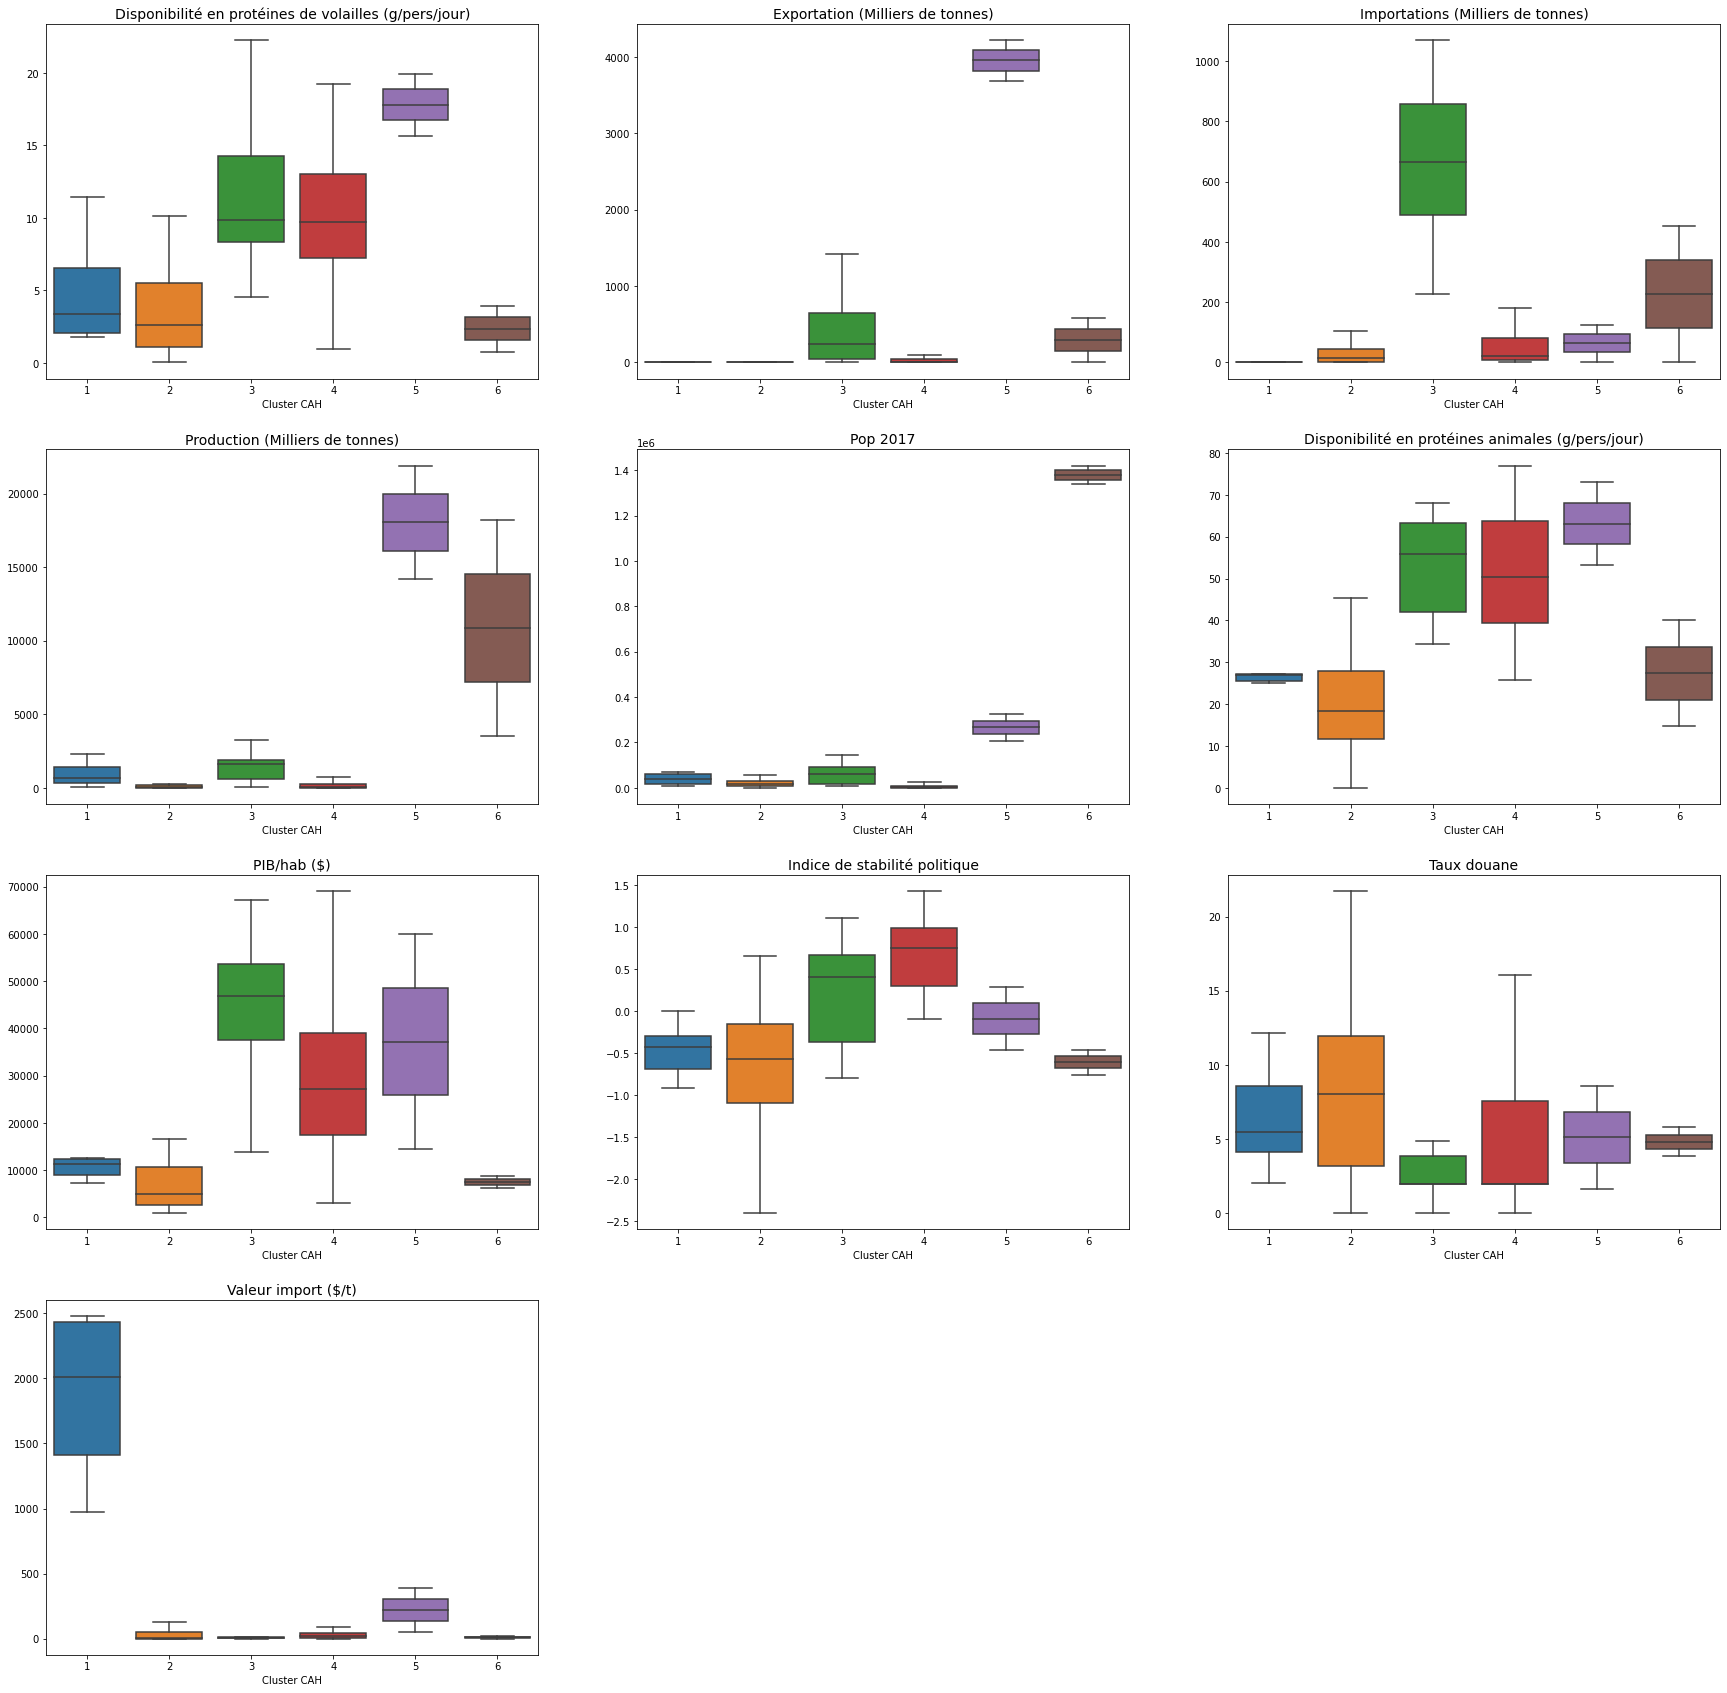

In [28]:
k = df[df.columns[:10]].values

# boxplot de chaque indicateur
fig = plt.figure(figsize=(30, 30))
for feat_idx in range(k.shape[1]):
    ax = fig.add_subplot(4, 3, (feat_idx+1))
    ax = sns.boxplot(data=df, y=k[:, feat_idx], x='Cluster CAH', showfliers=False)
    ax.set_title(df.columns[feat_idx], fontsize=14);

Pour les tests suivants nous auront besoin de la librairie scipi.
Notre seuil de test sera de 5%

In [29]:
from scipy.stats import levene, shapiro, f_oneway
ALPHA = 0.05

### Test d'homoscédasticité

Nous réalisons pour celà un test de Levene (évalue l'égalité des variances).

H0 : les variances sont égales
H1 : au moins une des variances diffère des autres

In [51]:
lev = []
for column in df:
    stat, pval = levene(df[column].loc[df["Cluster CAH"] == 1],
                        df[column].loc[df["Cluster CAH"] == 2],
                        df[column].loc[df["Cluster CAH"] == 3],
                        df[column].loc[df["Cluster CAH"] == 4],
                        df[column].loc[df["Cluster CAH"] == 5],
                        df[column].loc[df["Cluster CAH"] == 6],
                        center='mean')
    H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
    lev.append((column, stat, pval, H0))
pd.DataFrame(lev, columns=("Variable", "Stat", "p-value", "Hypothèse")).set_index("Variable")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,Stat,p-value,Hypothèse
Variable,,,
Disponibilité en protéines de volailles (g/pers/jour),3.428504,5.765686e-03,Hypothèse rejetée
Exportation (Milliers de tonnes),19.644891,4.137524e-15,Hypothèse rejetée
Importations (Milliers de tonnes),23.072996,3.006848e-17,Hypothèse rejetée
Production (Milliers de tonnes),128.521362,4.187386e-53,Hypothèse rejetée
Pop 2017,8.837932,2.145677e-07,Hypothèse rejetée
Disponibilité en protéines animales (g/pers/jour),3.565694,4.439518e-03,Hypothèse rejetée
PIB/hab ($),8.065653,8.820607e-07,Hypothèse rejetée
Indice de stabilité politique,3.178537,9.266663e-03,Hypothèse rejetée
Taux douane,3.227864,8.440107e-03,Hypothèse rejetée


Résultat : hypothèse rejetée, au moins une des variances diffère des autres.

### Test de Normalité

Nous utilisons un test de Shapiro-Wilk, il permet de savoir si une série de données suit une loi normale.  
NB : les clusters clusterCAH5 et clusterCAH6 ne pourront être testés (N<3)

H0 : la distribution suit une loi normale
H1 : la distribution ne suit pas une loi normale

In [32]:
shap = []
for i in[clusterCAH1, clusterCAH2, clusterCAH3, clusterCAH4]:
    for column in df:
        dft = df[df["Cluster CAH"] == i]
        stat, pval = shapiro(dft[column])
        H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
        shap.append((i, column, stat, pval, H0))
pd.DataFrame(shap, columns=("Cluster", "Variable", "Stat", "p-value", "Hypothèse")).set_index("Cluster")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,Variable,Stat,p-value,Hypothèse
Cluster,,,,
1,Disponibilité en protéines de volailles (g/per...,0.845362,1.443122e-01,Hypothèse non rejetée
1,Exportation (Milliers de tonnes),0.501067,2.428227e-05,Hypothèse rejetée
1,Importations (Milliers de tonnes),0.821616,9.113510e-02,Hypothèse non rejetée
1,Production (Milliers de tonnes),0.906212,4.119472e-01,Hypothèse non rejetée
1,Pop 2017,0.704153,6.835031e-03,Hypothèse rejetée
1,Disponibilité en protéines animales (g/pers/jour),0.854266,1.703437e-01,Hypothèse non rejetée
1,PIB/hab ($),0.942407,6.786517e-01,Hypothèse non rejetée
1,Indice de stabilité politique,0.984218,9.705002e-01,Hypothèse non rejetée
1,Taux douane,0.951181,7.498320e-01,Hypothèse non rejetée


Résultat : hypothèse non rejetée pour au moins 1 variable dans chaque cluster, la distribution suit une loi normale.

### Analyse de variance

Le test d'ANOVA va nous permettre de vérifier que les moyennes des clusters sont différentes. 

H0 : les moyennes sont égales
H1 au moins une des moyennes diffère

In [33]:
anova = []
for column in df:
        stat, pval = f_oneway(df[column].loc[df["Cluster CAH"] == 1],
                              df[column].loc[df["Cluster CAH"] == 2],
                              df[column].loc[df["Cluster CAH"] == 3],
                              df[column].loc[df["Cluster CAH"] == 4],
                              df[column].loc[df["Cluster CAH"] == 5],
                             df[column].loc[df["Cluster CAH"] == 6])
        H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
        anova.append((column, stat, pval, H0))
pd.DataFrame(anova, columns=("Variable", "Stat", "p-value", "Hypothèse")).set_index("Variable")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,Stat,p-value,Hypothèse
Variable,,,
Disponibilité en protéines de volailles (g/pers/jour),27.301572,1.023079e-19,Hypothèse rejetée
Exportation (Milliers de tonnes),227.987894,2.863419e-69,Hypothèse rejetée
Importations (Milliers de tonnes),81.365383,1.949341e-41,Hypothèse rejetée
Production (Milliers de tonnes),131.274950,1.125960e-53,Hypothèse rejetée
Pop 2017,527.489146,6.170947e-95,Hypothèse rejetée
Disponibilité en protéines animales (g/pers/jour),27.935941,4.512846e-20,Hypothèse rejetée
PIB/hab ($),23.867241,1.001942e-17,Hypothèse rejetée
Indice de stabilité politique,31.771062,3.808781e-22,Hypothèse rejetée
Taux douane,4.083408,1.649205e-03,Hypothèse rejetée


Résultat : pour chaque variable, l'hypothèse H0 est rejetée, au moins une des moyennes diffèrent des autres.

# Algorithme du K-means
  
Nous allons maintenant réaliser un *clustering K-Means*, nous allons calculer l'inertie puis le coefficient de silhouette, pour pouvoir ensuite choisir la taille de cluster la plus appropriée. Mais une critique métier reste essentielle pour la pertinence du nombre de clusters en fonction des objectifs de l'entreprise.  

### Inertie du modèle 

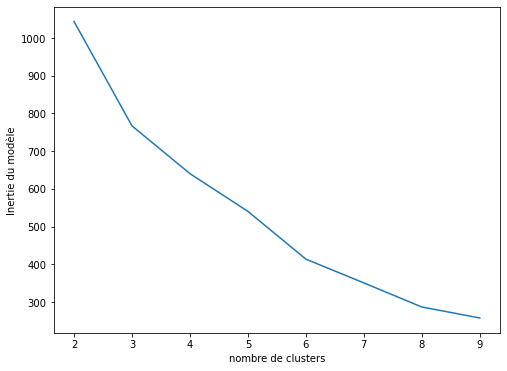

In [34]:
inertie = []

for k in range(2,10):
    model=cluster.KMeans(n_clusters=k).fit(X_trans)
    inertie.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(range(2,10),inertie)
plt.xlabel('nombre de clusters')
plt.ylabel('Inertie du modèle')
plt.show();

Avec la méthode d'inertie, pour optimiser et ne pas perdre trop d'information il serait indiquer de choisir un k = 2, 3 ou 6.

### Coefficient de silhouette

,2,3,4,5,6,7,8,9
coefficient de silhouette,0.338622,0.349221,0.364898,0.362562,0.390011,0.369784,0.335513,0.340745


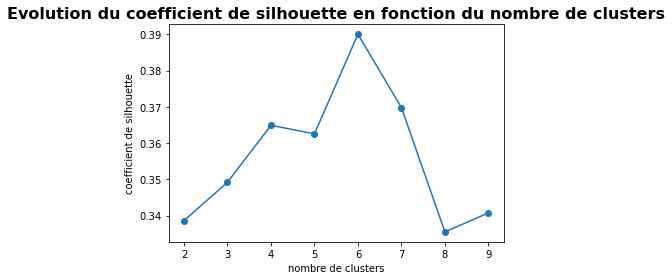

In [38]:
silhouette = []
k_range = range(2, 10)
for num_cls in range(2, 10):
    modelkm = KMeans(n_clusters = num_cls)
    modelkm.fit_predict(X_trans)
    cluster_labels = modelkm.fit_predict(X_trans)
    silh = metrics.silhouette_score(X_trans, cluster_labels)
    silhouette.append(silh)
    
plt.plot(range(2, 10), silhouette, marker = 'o')
plt.xlabel('nombre de clusters')
plt.ylabel('coefficient de silhouette')
plt.title('Evolution du coefficient de silhouette en fonction du nombre de clusters', fontsize=16, fontweight='bold')
plt.show
silhouette = pd.DataFrame(silhouette, index = np.arange(2, 10), columns=['coefficient de silhouette']).T
silhouette

La 1er méthode (inertie) nous donne un nombre de 2, 3 ou 6 clusters, la 2e méthode (coeff de silhouette) nous donne un nombre optimal de 6 clusters.
La projection en 2 clusters est possible, mais l'analyse sera plus fine en 6 clusters.   
(De plus, la comparaison sera possible avec les 6 groupes identifiés lors du précédent partitionnement, le contexte nous oriente davantage vers un clustering en 6 partitions.)

### Projection des centroides et des individus par cluster

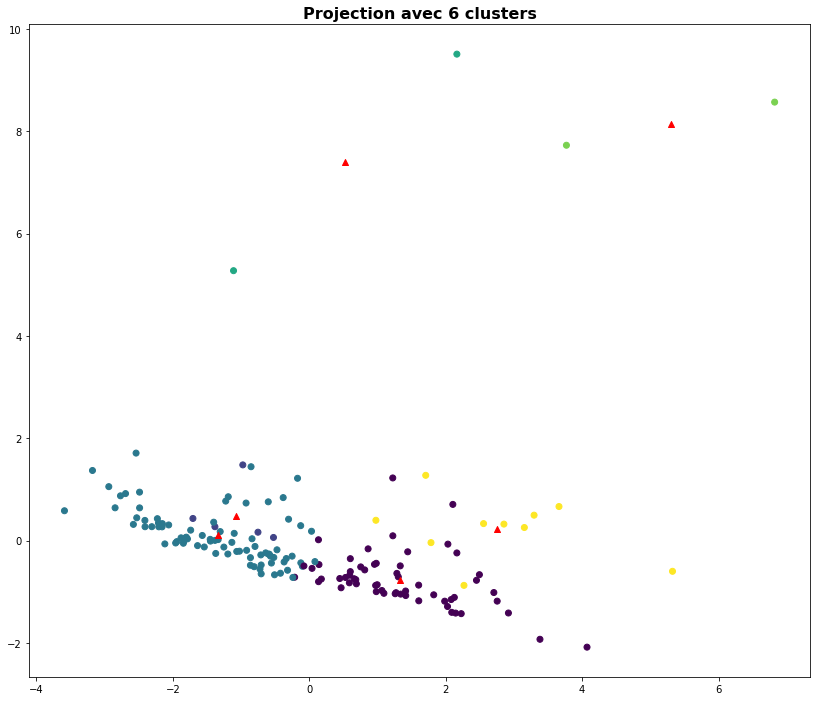

In [40]:
km6 = cluster.KMeans(n_clusters=6)
modelkm6 = km6.fit_predict(X_trans)
centroid6 = km6.cluster_centers_
# centroid5_proj = pca.transform(centroid5)

fig = plt.figure(figsize=(14,12))
plt.scatter(X_trans[:,0],X_trans[:,1], c=modelkm6)
plt.scatter(centroid6[:,0], centroid6[:,1], marker='^', c='red')
plt.title('Projection avec 6 clusters', fontsize=16, fontweight='bold');

In [41]:
# ajout du cluster déterminé par K-Means au df initial
df['Cluster KM'] = km6.labels_+1
df

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),Cluster CAH,Cluster KM
Pays,,,,,,,,,,,,
Afghanistan,0.54,0.0,29.0,28.0,36296.113,10.7,2058.4,-2.80,5.923333,151.00,2,3
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,35.7,13860.3,-0.28,4.610000,3.32,3,6
Albanie,6.26,0.0,38.0,13.0,2884.169,61.0,12771.0,0.38,0.850000,40.95,4,1
Algérie,1.97,0.0,2.0,275.0,41389.189,25.0,11737.4,-0.92,9.380000,1708.59,1,2
Allemagne,7.96,646.0,842.0,1514.0,82658.409,63.0,53071.5,0.59,1.960000,15.85,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,4.65,3.0,249.0,1272.0,105172.925,26.0,8120.9,-1.19,1.660000,0.00,2,3
Timor-Leste,1.46,0.0,11.0,1.0,1243.258,14.6,3177.5,0.07,2.500000,0.00,2,3
Turkménistan,1.53,0.0,9.0,20.0,5757.667,36.7,14205.0,-0.13,0.000000,0.00,2,3


In [42]:
km_df = df.groupby('Cluster KM').mean().drop(columns='Cluster CAH')
km_df

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t)
Cluster KM,,,,,,,,,,
1,10.139655,67.810345,65.258621,444.465517,1.365594e+04,54.837931,34925.646552,0.602414,3.042978,64.411379
2,4.982000,1.800000,1.600000,783.200000,7.193626e+04,27.400000,10199.860000,-0.414000,5.240000,2558.738000
3,4.711325,19.626506,41.795181,239.469880,2.656778e+04,19.522892,8058.957831,-0.533253,9.288314,66.422048
4,2.355000,290.000000,226.000000,10890.500000,1.379849e+06,27.350000,7499.950000,-0.610000,4.805000,9.400000
5,17.805000,3956.500000,63.000000,18057.500000,2.664593e+05,63.150000,37219.700000,-0.090000,5.125000,219.980000
6,12.240000,377.300000,735.200000,1399.700000,5.904342e+04,54.580000,44846.740000,0.302000,2.583000,9.846000


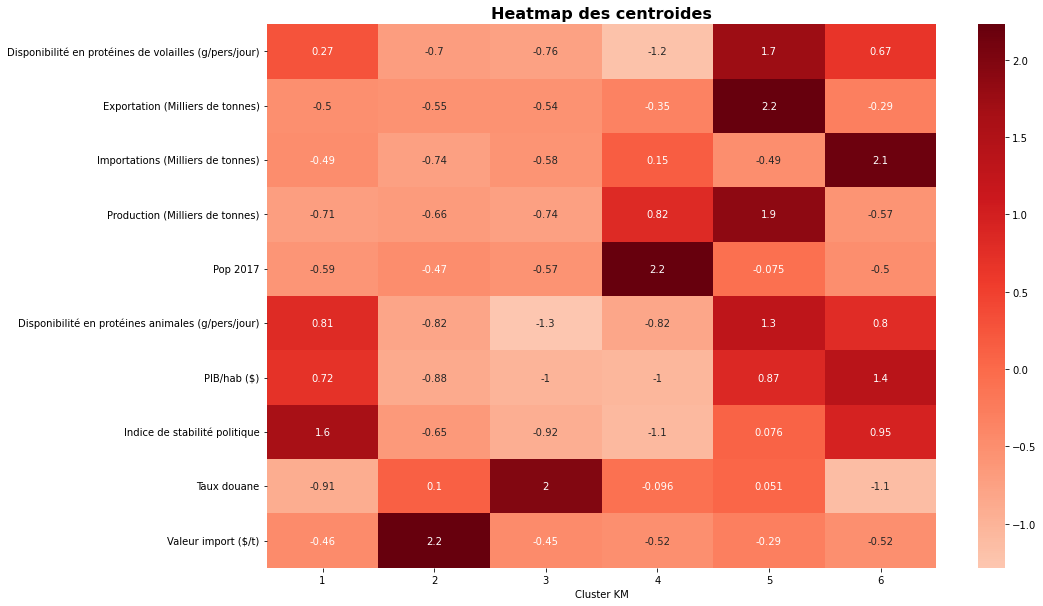

In [43]:
# les données sont centrées et réduites
km_df_scaled = scaler.fit_transform(km_df)
km_df_scaled = pd.DataFrame(km_df_scaled, index=km_df.index, columns=km_df.columns).T

fig = plt.figure(figsize=(15,10))
sns.heatmap(km_df_scaled, center=0, cmap='Reds', annot=True)
plt.title('Heatmap des centroides', fontsize=16, fontweight='bold');

<Figure size 1080x720 with 0 Axes>

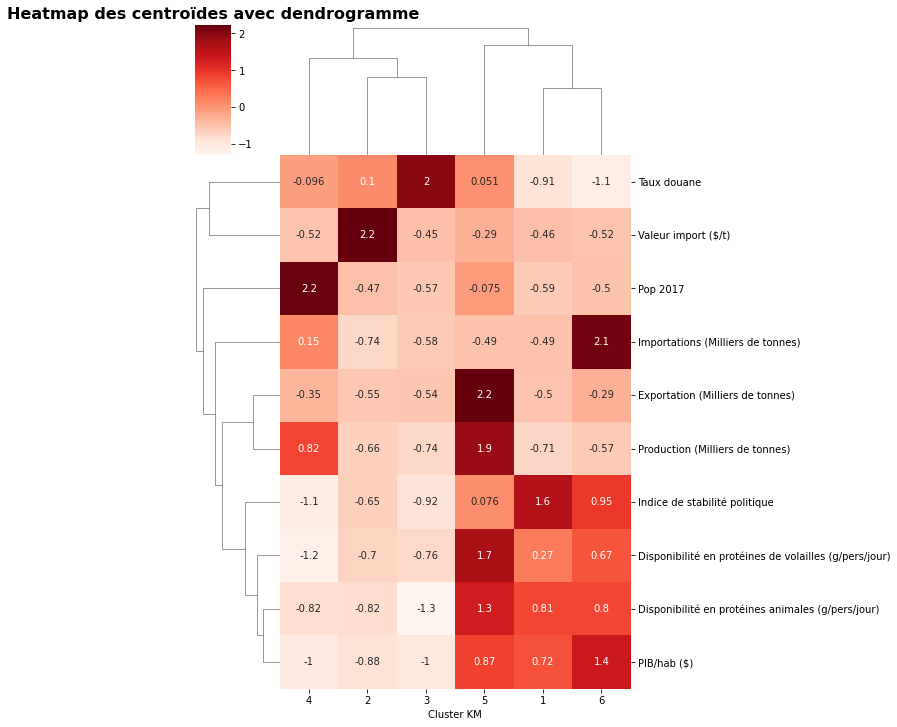

In [44]:
km_df_scaled = scaler.fit_transform(km_df)
km_df_scaled = pd.DataFrame(km_df_scaled, index=km_df.index, columns=km_df.columns).T

fig = plt.figure(figsize=(15,10))
sns.clustermap(km_df_scaled, cmap='Reds', annot=True)
plt.title('Heatmap des centroïdes avec dendrogramme', fontsize=16, fontweight='bold');

L'initialisation de l'algorithme étant aléatoire, le numéro de cluster peut changer d'une exécution à l'autre.

In [45]:
clusterKM1 = km_df.index[km_df['Indice de stabilité politique'] == max(km_df['Indice de stabilité politique'])][0]
clusterKM2 = km_df.index[km_df['Valeur import ($/t)'] == max(km_df['Valeur import ($/t)'])][0]
clusterKM3 = km_df.index[km_df['Taux douane'] == max(km_df['Taux douane'])][0]
clusterKM4 = km_df.index[km_df['Pop 2017'] == max(km_df['Pop 2017'])][0]
clusterKM5 = km_df.index[km_df['Exportation (Milliers de tonnes)'] == max(km_df['Exportation (Milliers de tonnes)'])][0]
clusterKM6 = km_df.index[km_df['Importations (Milliers de tonnes)'] == max(km_df['Importations (Milliers de tonnes)'])][0]


In [46]:
# Nombre et exemples de pays dans chaque cluster
for i in df.sort_values('Cluster KM')['Cluster KM'].unique():
    print('Cluster KM', i, ':', len(df[df['Cluster KM']==i]), 'Pays\n' + 
        ', '.join(df[df['Cluster KM']==i].index.values), '\n' + '- '*3)

Cluster KM 1 : 58 Pays
Albanie, Argentine, Autriche, Belgique, Botswana, Bulgarie, Bélarus, Canada, Chili, Chine - RAS de Macao, Chypre, Costa Rica, Croatie, Danemark, Dominique, Espagne, Estonie, Finlande, Fédération de Russie, Grèce, Hongrie, Irlande, Israël, Italie, Jamaïque, Kazakhstan, Koweït, Lettonie, Lituanie, Luxembourg, Malaisie, Malte, Maurice, Mongolie, Monténégro, Norvège, Oman, Panama, Pologne, Portugal, Roumanie, République de Corée, République dominicaine, Saint-Vincent-et-les Grenadines, Samoa, Serbie, Slovaquie, Slovénie, Suisse, Suède, Tchéquie, Trinité-et-Tobago, Uruguay, Pérou, Chine, Taiwan Province de, Nouvelle-Calédonie, Polynésie française, Australie 
- - - 
Cluster KM 2 : 5 Pays
Algérie, Bolivie (État plurinational de), Indonésie, Maroc, Paraguay 
- - - 
Cluster KM 3 : 83 Pays
Afghanistan, Angola, Antigua-et-Barbuda, Arménie, Azerbaïdjan, Bahamas, Bangladesh, Belize, Bosnie-Herzégovine, Burkina Faso, Bénin, Cabo Verde, Cambodge, Cameroun, Colombie, Congo, Côte

Chaque groupe présente un maximum et un minimum dans des variables différentes ce qui permet de les caractériser globalement en les comparants avec les groupes ACP.

<b>Analyse des clusters :</b>

- <b> ClusterKM1 :</b> (Idem CAH_4)Petits pays stables politiquement avec un PBI élevé. Ils importent autant qu'ils exportent et on une dépendance moyenne à l'importation. Valeur d'import supérieur au cluster cible. (cible potenciel).

- <b> ClusterKM2 :</b> (Idem CAH_1) Pays producteur de volaille qui importe très peu. Ou la valeur d'import est très élevé mais une stabilité politique faible.

- <b> ClusterKM3 :</b> (Idem CAH_2)pays en voie de développement à la stabilité politique basse. Les frais de douane y sont élevés et le prix à l'import aussi. La demande en viande de volailles pourrait y être forte (production faible, forte dépendance aux importations) mais les difficultés économiques écartent ces pays pour nos exportations. 

- <b> ClusterKM4 :</b> (Idem CAH_6) L'Inde et la Chine (population supérieure à 1 Milliard). La consommation de volailles y est faible.

- <b> ClusterKM5 :</b> (Idem CAH_5) Les EUA et le Brésil, pays producteurs de volaille (dépendance aux importations très faible) avec une forte exportation.

- <b> ClusterKM6 :</b> (Idem CAH_3) pays riches et stables politiquement avec une forte dépendance aux importations et à un prix élevé. Les taux de douanes sont faibles, ce sont les pays de ce cluster que nous devons cibler. 


Il est normal de ne pas avoir exactement les mêmes résultats avec la méthode des centres mobiles (K-Means). Le principe est le suivrant, faire varier le nombre de clusters et surveiller l’évolution d’un indicateur de qualité (silhouettes, inerties…), c'est-à-dire l’aptitude des pays à être plus proches de ses congénères du même cluster que les pays des autres clusters.  

<b>Le cluster KM6 est retenu. </b>

En conclusion à ce deuxième partitionnement, il ressort que 10 pays sont susceptibles de devenir une cible pertinente pour l'entreprise.

# Analyse statistique

### Représentation de la distribution des variables par cluster

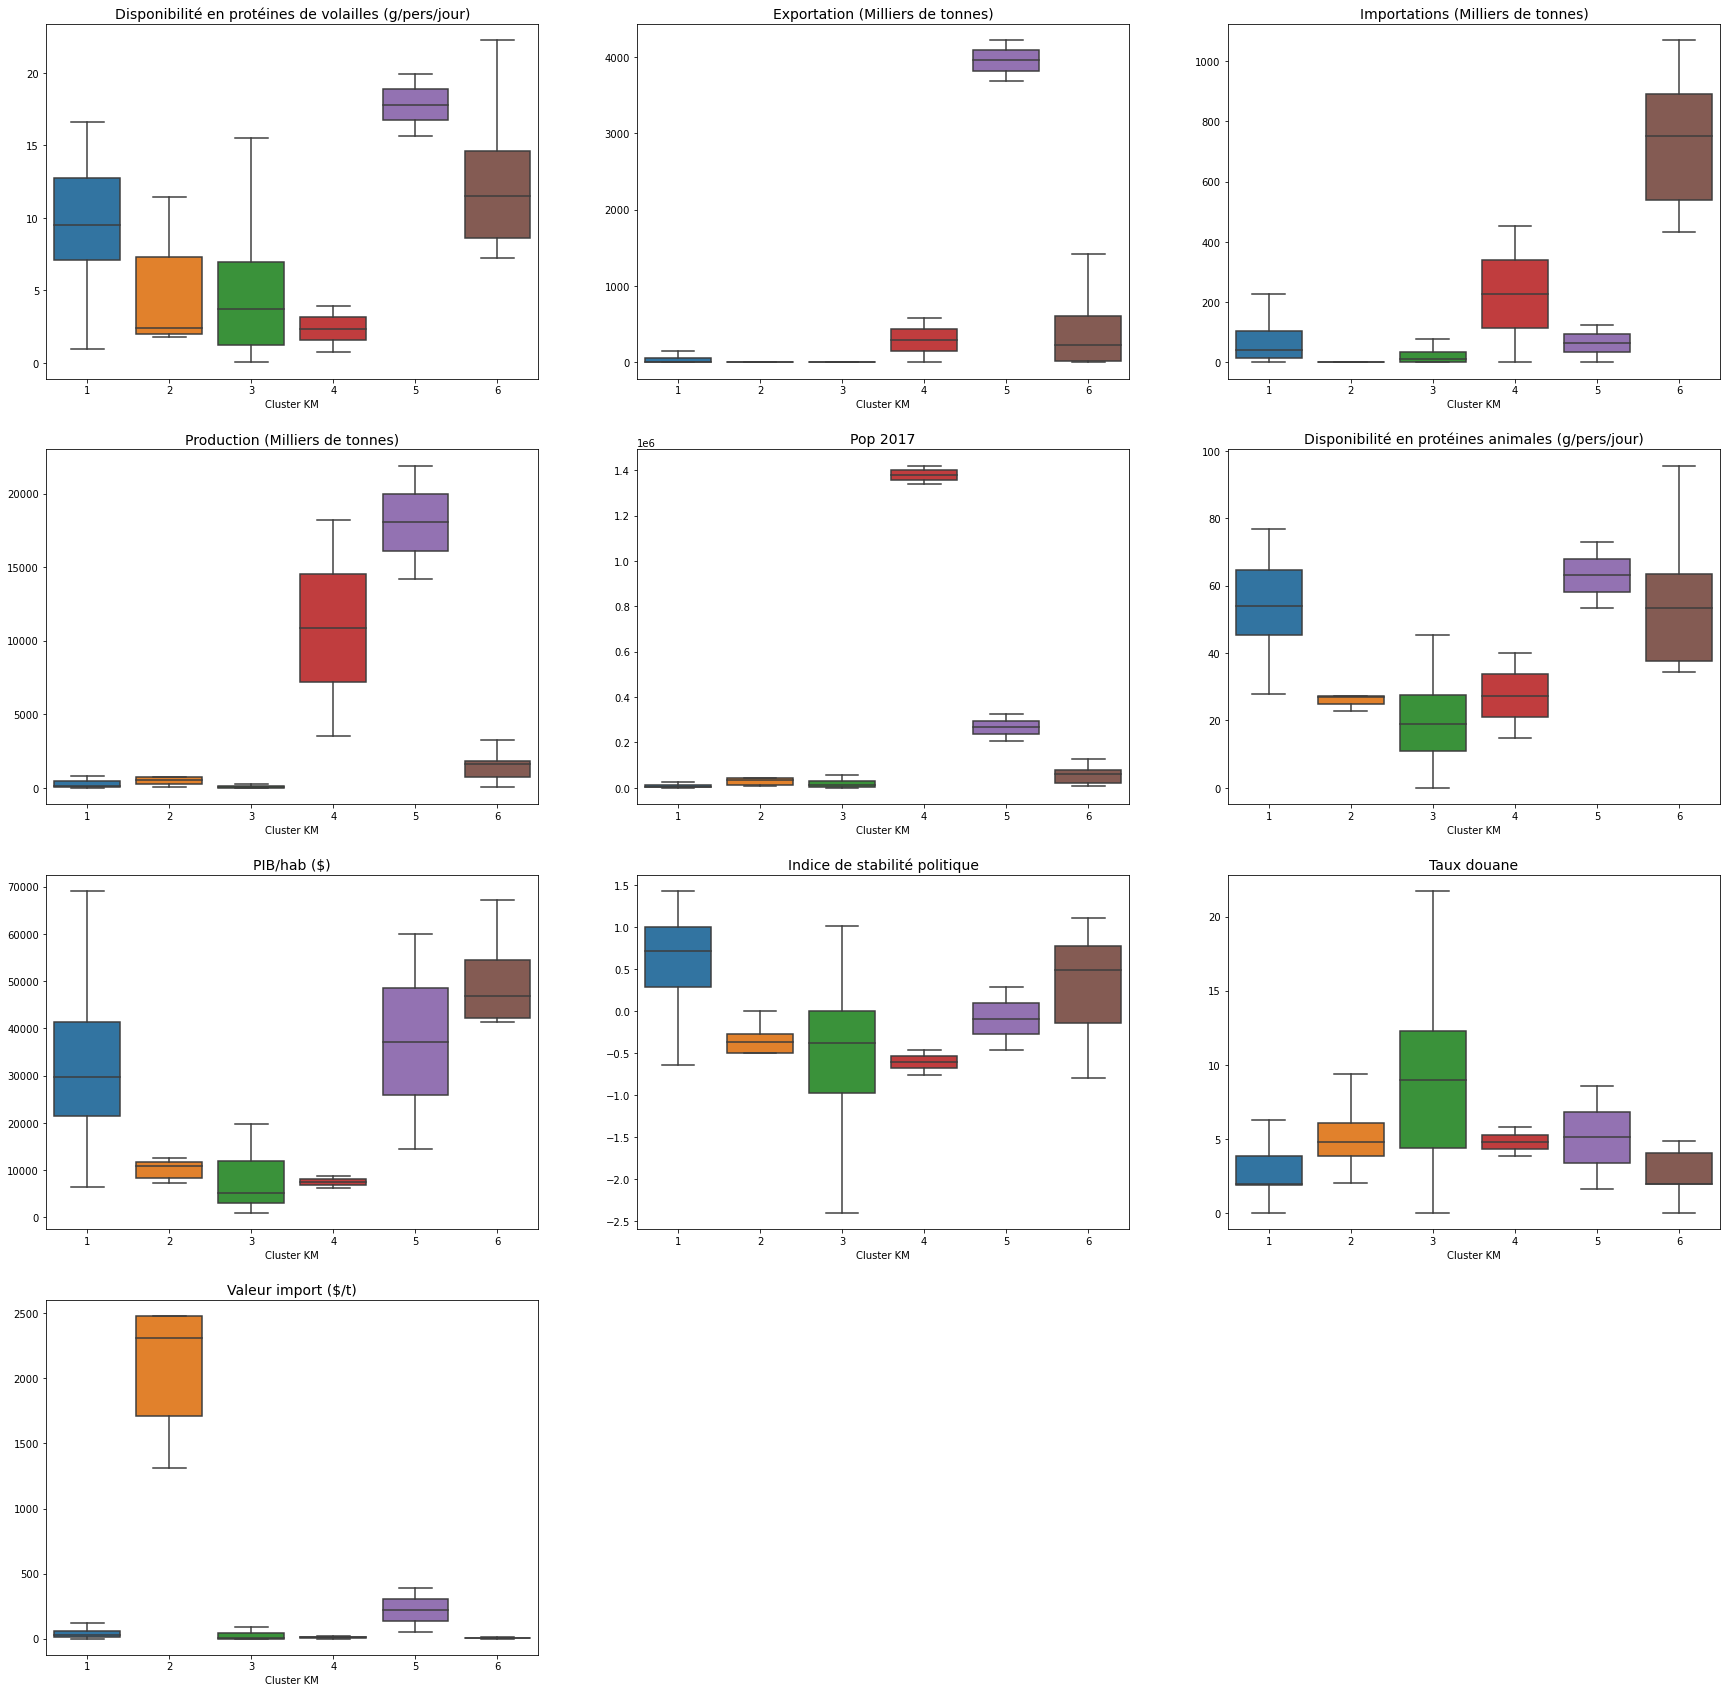

In [47]:
k = df[df.columns[:10]].values

# boxplot de chaque indicateur
fig = plt.figure(figsize=(30, 30))
for feat_idx in range(k.shape[1]):
    ax = fig.add_subplot(4, 3, (feat_idx+1))
    ax = sns.boxplot(data=df, y=k[:, feat_idx], x='Cluster KM', showfliers=False)
    ax.set_title(df.columns[feat_idx], fontsize=14);

### Test d'homoscédasticité

Nous réalisons pour celà un test de Levene

H0 : les variances sont égales  
H1 : au moins une des variances diffère des autres

In [48]:
lev = []
for column in df:
    stat, pval = levene(df[column].loc[df["Cluster KM"] == 1],
                        df[column].loc[df["Cluster KM"] == 2],
                        df[column].loc[df["Cluster KM"] == 3],
                        df[column].loc[df["Cluster KM"] == 4],
                        df[column].loc[df["Cluster KM"] == 5],
                        df[column].loc[df["Cluster KM"] == 6],
                        center='mean')
    H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
    lev.append((column, stat, pval, H0))
pd.DataFrame(lev, columns=("Variable", "Stat", "p-value", "Hypothèse")).set_index("Variable")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,Stat,p-value,Hypothèse
Variable,,,
Disponibilité en protéines de volailles (g/pers/jour),0.480506,7.904186e-01,Hypothèse non rejetée
Exportation (Milliers de tonnes),12.850691,1.900781e-10,Hypothèse rejetée
Importations (Milliers de tonnes),12.867975,1.846224e-10,Hypothèse rejetée
Production (Milliers de tonnes),101.239311,7.419028e-47,Hypothèse rejetée
Pop 2017,6.441867,1.827322e-05,Hypothèse rejetée
Disponibilité en protéines animales (g/pers/jour),2.549978,3.008353e-02,Hypothèse rejetée
PIB/hab ($),7.628513,1.979699e-06,Hypothèse rejetée
Indice de stabilité politique,3.012803,1.267258e-02,Hypothèse rejetée
Taux douane,7.568038,2.214978e-06,Hypothèse rejetée


In [ ]:
Résultats : Hypothèse rejetée, au moins une des variances diffère des autres.

### Test de Normalité

Nous utilisons un test de Shapiro-Wilk  
NB : les clusterKM4 et clusterKM5 ne pourront être testés (N<3)

H0 : la distribution suit une loi normale
H1 : la distribution ne suit pas une loi normale

In [50]:
shap = []
for i in[clusterKM1, clusterKM2, clusterKM3, clusterKM6]:
    for column in df:
        dft = df[df["Cluster KM"] == i]
        stat, pval = shapiro(dft[column])
        H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
        shap.append((i, column, stat, pval, H0))
pd.DataFrame(shap, columns=("Cluster", "Variable", "Stat", "p-value", "Hypothèse")).set_index("Cluster")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,Variable,Stat,p-value,Hypothèse
Cluster,,,,
1,Disponibilité en protéines de volailles (g/per...,0.927534,1.920800e-03,Hypothèse rejetée
1,Exportation (Milliers de tonnes),0.438463,1.485808e-13,Hypothèse rejetée
1,Importations (Milliers de tonnes),0.823688,7.790329e-07,Hypothèse rejetée
1,Production (Milliers de tonnes),0.604517,3.044949e-11,Hypothèse rejetée
1,Pop 2017,0.571646,9.515264e-12,Hypothèse rejetée
1,Disponibilité en protéines animales (g/pers/jour),0.977486,3.534117e-01,Hypothèse non rejetée
1,PIB/hab ($),0.814451,4.473600e-07,Hypothèse rejetée
1,Indice de stabilité politique,0.953689,2.694562e-02,Hypothèse rejetée
1,Taux douane,0.777053,5.526965e-08,Hypothèse rejetée


Résultat : hypothèse non rejetée pour au moins 1 variable dans chaque cluster, la distribution suit une loi normale.

### Analyse de variance

Le but est de tester les moyennes de nos clusters

H0 : les moyennes sont égales
H1 au moins une des moyennes diffère

In [52]:
anova = []
for column in df:
        stat, pval = f_oneway(df[column].loc[df["Cluster KM"] == 1],
                              df[column].loc[df["Cluster KM"] == 2],
                              df[column].loc[df["Cluster KM"] == 3],
                              df[column].loc[df["Cluster KM"] == 4],
                              df[column].loc[df["Cluster KM"] == 5])
        H0 = "Hypothèse non rejetée" if pval > ALPHA else "Hypothèse rejetée"
        anova.append((column, stat, pval, H0))
pd.DataFrame(anova, columns=("Variable", "Stat", "p-value", "Hypothèse")).set_index("Variable")

/Users/lepeltier.c/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,Stat,p-value,Hypothèse
Variable,,,
Disponibilité en protéines de volailles (g/pers/jour),14.741644,3.960758e-10,Hypothèse rejetée
Exportation (Milliers de tonnes),411.873264,4.504908e-78,Hypothèse rejetée
Importations (Milliers de tonnes),3.619602,7.639697e-03,Hypothèse rejetée
Production (Milliers de tonnes),153.696926,4.214081e-51,Hypothèse rejetée
Pop 2017,615.204720,7.673518e-90,Hypothèse rejetée
Disponibilité en protéines animales (g/pers/jour),82.498124,2.239154e-36,Hypothèse rejetée
PIB/hab ($),28.431268,1.928244e-17,Hypothèse rejetée
Indice de stabilité politique,21.940775,3.550136e-14,Hypothèse rejetée
Taux douane,13.700539,1.680782e-09,Hypothèse rejetée


Résultat : l'hypothèse H0 est rejetée, au moins une des moyennes diffèrent des autres.  
Nos clusters sont différents les uns des autres.

Comparons les résultats des deux partitionnement.

# Comparaison des résultats

Les deux algorithmes utilisés ont chacun fait ressortir un groupe-cible à privilégier.
Comparons maintenant ces 2 groupes

In [53]:
clusterCAH_retenu = df[df["Cluster CAH"] == 3]
clusterCAH_retenu

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),Cluster CAH,Cluster KM
Pays,,,,,,,,,,,,
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,35.7,13860.3,-0.28,4.61,3.32,3,6
Allemagne,7.96,646.0,842.0,1514.0,82658.409,63.0,53071.5,0.59,1.96,15.85,3,6
Arabie saoudite,15.57,11.0,722.0,616.0,33101.179,34.6,47306.2,-0.64,4.85,1.92,3,6
Belgique,4.57,655.0,338.0,463.0,11419.748,57.7,50442.3,0.43,1.96,116.48,3,1
Chine - RAS de Hong-Kong,22.26,663.0,907.0,24.0,7306.322,95.7,59842.2,0.83,0.00,1.73,3,6
France,8.95,500.0,506.0,1750.0,64842.509,63.7,44577.1,0.28,1.96,4.59,3,6
Fédération de Russie,10.44,115.0,226.0,4444.0,145530.082,54.0,25926.4,-0.64,3.61,14.53,3,1
Japon,7.24,10.0,1069.0,2215.0,127502.725,47.7,41444.2,1.11,2.51,1.46,3,6
Mexique,9.26,8.0,972.0,3249.0,124777.324,44.0,19721.3,-0.80,1.24,4.88,3,6


In [54]:
clusterKM_retenu = df[df["Cluster KM"] == 6]
clusterKM_retenu

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),Cluster CAH,Cluster KM
Pays,,,,,,,,,,,,
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,35.7,13860.3,-0.28,4.61,3.32,3,6
Allemagne,7.96,646.0,842.0,1514.0,82658.409,63.0,53071.5,0.59,1.96,15.85,3,6
Arabie saoudite,15.57,11.0,722.0,616.0,33101.179,34.6,47306.2,-0.64,4.85,1.92,3,6
Chine - RAS de Hong-Kong,22.26,663.0,907.0,24.0,7306.322,95.7,59842.2,0.83,0.00,1.73,3,6
France,8.95,500.0,506.0,1750.0,64842.509,63.7,44577.1,0.28,1.96,4.59,3,6
Japon,7.24,10.0,1069.0,2215.0,127502.725,47.7,41444.2,1.11,2.51,1.46,3,6
Mexique,9.26,8.0,972.0,3249.0,124777.324,44.0,19721.3,-0.80,1.24,4.88,3,6
Pays-Bas,8.48,1418.0,608.0,1100.0,17021.347,68.0,55088.6,0.92,1.96,55.48,3,6
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,13.77,359.0,779.0,1814.0,66727.461,59.0,46372.4,0.39,1.99,8.82,3,6


Il peut-être intéressant de créer un groupe contenant les pays présents dans les 2 clusters et de voir les sous-groupes qui s'en dégagent.

In [55]:
# df des pays retenus par CAH ou KM 
group = pd.concat([clusterKM_retenu, clusterCAH_retenu]).drop(columns=['Cluster CAH', 'Cluster KM']).drop_duplicates()
group

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t)
Pays,,,,,,,,,,
Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,35.7,13860.3,-0.28,4.61,3.32
Allemagne,7.96,646.0,842.0,1514.0,82658.409,63.0,53071.5,0.59,1.96,15.85
Arabie saoudite,15.57,11.0,722.0,616.0,33101.179,34.6,47306.2,-0.64,4.85,1.92
Chine - RAS de Hong-Kong,22.26,663.0,907.0,24.0,7306.322,95.7,59842.2,0.83,0.00,1.73
France,8.95,500.0,506.0,1750.0,64842.509,63.7,44577.1,0.28,1.96,4.59
Japon,7.24,10.0,1069.0,2215.0,127502.725,47.7,41444.2,1.11,2.51,1.46
Mexique,9.26,8.0,972.0,3249.0,124777.324,44.0,19721.3,-0.80,1.24,4.88
Pays-Bas,8.48,1418.0,608.0,1100.0,17021.347,68.0,55088.6,0.92,1.96,55.48
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,13.77,359.0,779.0,1814.0,66727.461,59.0,46372.4,0.39,1.99,8.82


# Projection sur les plans factoriels

### Projection des 6 clusters

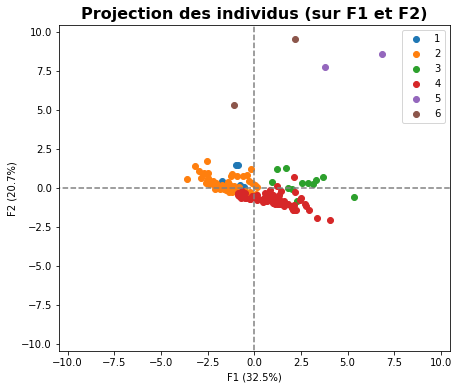

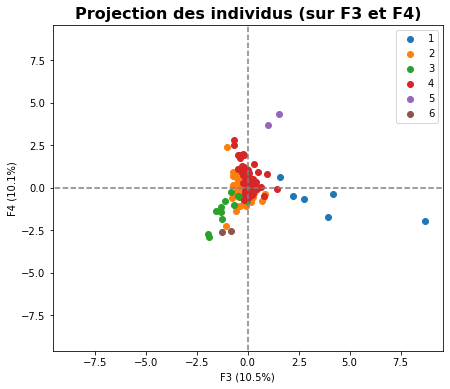

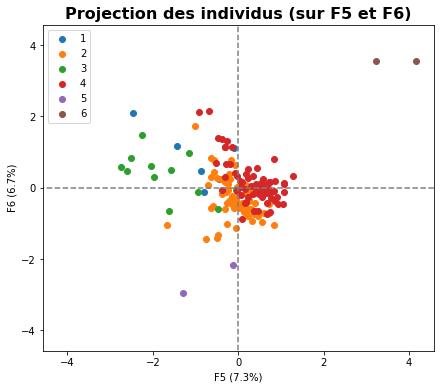

In [56]:
# projection de X sur les composantes principales
X_projected = pca.transform(X_scaled)

display_factorial_planes (X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = clusters, labels=None)

Les clusters sont bien distincts selon la projection sur F1 et F2, les clusters  et  montrent bien l'influence forte des variables Production et Population sur la 2e CP.